# SUPERVISED LEARNING

The question is:

Do the following in the iris dataset.

    1.Read the dataset to the python environment.
    2.Do necessary pre-processing steps.
    3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# 1. Read the dataset into python environment

In [6]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_excel("iris (1).xls")

In [9]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.shape

(150, 5)

In [11]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# 2. Do necessary pre-processing steps

In [15]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [16]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

The dataset, titled, "iris (1)", consists of 150 rows and 5 columns namely 'SL', 'SW', 'PL', 'PW', and 'Classification' where SL-Sepal Length, SW-Sepal Width, PL-Petal Length, PW-Petal Width.

There are null values present in the dataset in three columns namely 'SL', 'SW' and 'PL'.

In [18]:
data.skew(axis=0,skipna=True)

C:\Users\ANUMC~1\AppData\Local\Temp/ipykernel_13244/3374440273.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew(axis=0,skipna=True)


SL    0.306823
SW    0.377818
PL   -0.268905
PW   -0.104997
dtype: float64

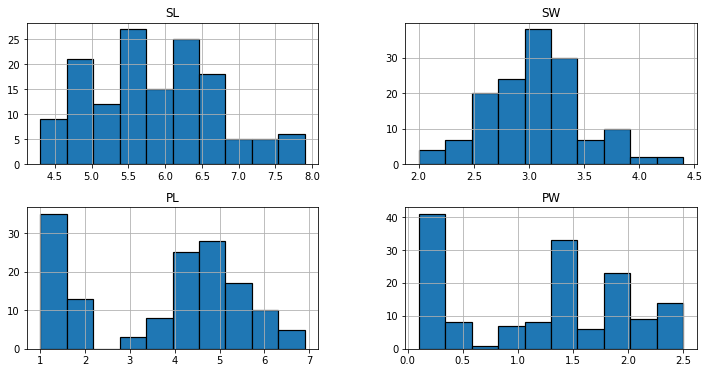

In [19]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [20]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [21]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now, all the missing values present in all the columns in the dataset are filled in

In [22]:
#Handling Outliers

Text(0.5, 1.0, 'boxplot of SL')

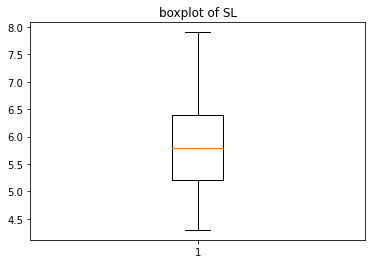

In [23]:
plt.boxplot(data['SL'])
plt.title('boxplot of SL')

There is no outliers in the column 'SL'.

Text(0.5, 1.0, 'boxplot of SW')

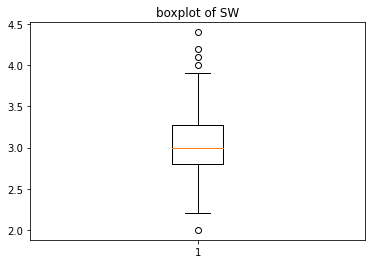

In [24]:
plt.boxplot(data['SW'])
plt.title('boxplot of SW')

In [25]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [26]:
outlier=[]
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [27]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [28]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [29]:
ind2=data['SW']<low_lim
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [30]:
data.drop([14, 15, 32, 33, 60],inplace= True)

Text(0.5, 1.0, 'boxplot of SW')

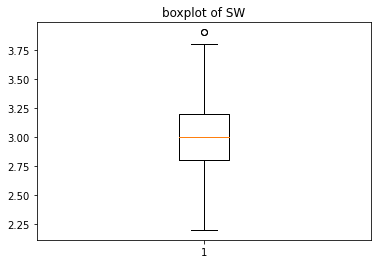

In [31]:
plt.boxplot(data['SW'])
plt.title('boxplot of SW')

Outliers in the column 'SW' are removed.

Text(0.5, 1.0, 'boxplot of PL')

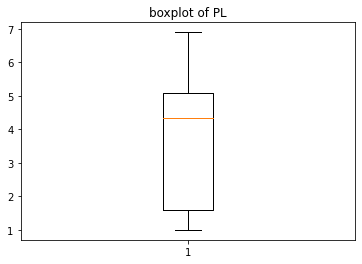

In [33]:
plt.boxplot(data['PL'])
plt.title('boxplot of PL')

There is no outliers in the column 'PL'.

Text(0.5, 1.0, 'boxplot of PW')

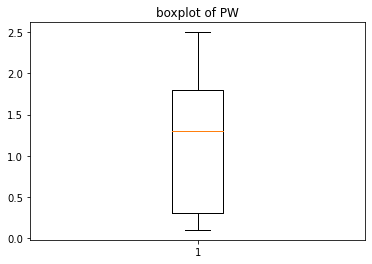

In [34]:
plt.boxplot(data['PW'])
plt.title('boxplot of PW')

There is no outliers in the column 'PW'.

In [35]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [36]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_encoder.fit_transform(data[a[i]])

In [37]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [38]:
y=pd.DataFrame(data['Classification'])
X=data.drop(['Classification'],axis=1)

In [39]:
X.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [40]:
y.describe()

,Classification
count,145.000000
mean,1.027586
std,0.816027
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [42]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(29, 1)

In [43]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [44]:
#MinMax Scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [45]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train.values.ravel())
y_pred = logit_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [47]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Accuracy :  0.9310344827586207
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29



Accuracy of logistic regression model is 93.1

In [48]:
#KNN
from sklearn.metrics import accuracy_score,classification_report

In [49]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric ='minkowski')
    classifier.fit(X_train,y_train.values.ravel())
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [50]:
acc_values

[0.9310344827586207,
 0.8620689655172413,
 0.896551724137931,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

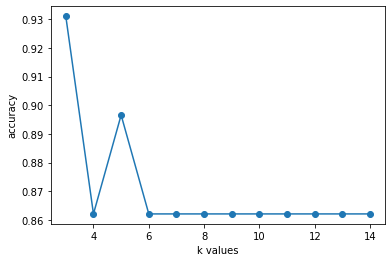

In [51]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')

In [52]:
classifier=KNeighborsClassifier(n_neighbors=3,metric ='minkowski')
classifier.fit(X_train,y_train.values.ravel())
y_pred=classifier.predict(X_test)

In [53]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Accuracy is: 0.9310344827586207
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



Accuracy of KNN is 93.1

In [54]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
y_pred=dec_tree.predict(X_test)

In [55]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy : 0.896551724137931
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



Accuaracy of decision tree model is 89.65

# Linear model

In [56]:
from sklearn.svm import SVC
l_svm=SVC(kernel='linear')
l_svm.fit(X_train,y_train.values.ravel())
y_pred=l_svm.predict(X_test)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy : 0.9310344827586207
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



Accuracy of SVM-linear is 93.1

# Polynomial Model

In [57]:
from sklearn.svm import SVC
p_svm=SVC(kernel='poly',degree=3)
p_svm.fit(X_train,y_train.values.ravel())
y_pred=p_svm.predict(X_test)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy : 0.8620689655172413
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.69      1.00      0.82         9
           2       1.00      0.64      0.78        11

    accuracy                           0.86        29
   macro avg       0.90      0.88      0.87        29
weighted avg       0.90      0.86      0.86        29



Accuracy of SVM-Polynomial model is 86.2

# Radial

In [58]:
r_svm = SVC(kernel = 'rbf')
r_svm.fit(X_train, y_train.values.ravel())
y_pred = r_svm.predict(X_test)

print("Accuracy is:",accuracy_score(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy is: 0.9310344827586207
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



Accuaracy of SVM Radial model is 93.1

In [60]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train.values.ravel())
y_pred=rf.predict(X_test)

In [61]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
rf.fit(X_train,y_train.values.ravel())
y_pred=rf.predict(X_test)

Accuracy is: 0.8620689655172413
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.73      0.89      0.80         9
           2       0.89      0.73      0.80        11

    accuracy                           0.86        29
   macro avg       0.87      0.87      0.87        29
weighted avg       0.87      0.86      0.86        29



Accuracy of random forest model is 89.65.

# INSIGHT:-

Logistic regression, KNN and SVM(linear and Radial model) have high accuracy.